In [1]:
import numpy as np

data=np.load('../res/Data/data.npy')
target=np.load('../res/Data/target.npy')

#loading the save numpy arrays in the previous code

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D

model=Sequential()

model.add(Conv2D(256,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(4,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [4]:
history=model.fit(train_data,train_target,epochs=30)

Epoch 1/30
836/836 [==============================] - 21s 19ms/step - loss: 1.1321 - accuracy: 0.4645
Epoch 2/30
836/836 [==============================] - 16s 19ms/step - loss: 0.7945 - accuracy: 0.6479
Epoch 3/30
836/836 [==============================] - 16s 19ms/step - loss: 0.7035 - accuracy: 0.6896
Epoch 4/30
836/836 [==============================] - 16s 19ms/step - loss: 0.6509 - accuracy: 0.7100
Epoch 5/30
836/836 [==============================] - 16s 19ms/step - loss: 0.6053 - accuracy: 0.7322
Epoch 6/30
836/836 [==============================] - 16s 19ms/step - loss: 0.5675 - accuracy: 0.7508
Epoch 7/30
836/836 [==============================] - 16s 19ms/step - loss: 0.5339 - accuracy: 0.7703
Epoch 8/30
836/836 [==============================] - 16s 19ms/step - loss: 0.4998 - accuracy: 0.7844
Epoch 9/30
836/836 [==============================] - 16s 19ms/step - loss: 0.4652 - accuracy: 0.8032
Epoch 10/30
836/836 [==============================] - 16s 19ms/step - loss: 0.433

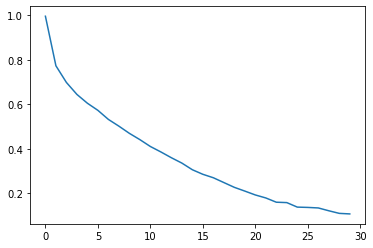

In [5]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])

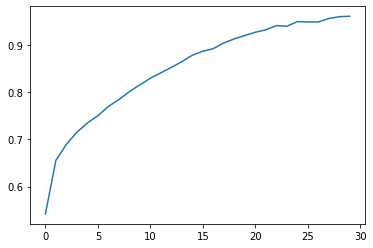

In [6]:
plt.plot(history.history['accuracy'])
#if not working replace 'accuracy' with 'acc'

In [7]:
print(model.evaluate(test_data,test_target))

93/93 [==============================] - 1s 10ms/step - loss: 1.2331 - accuracy: 0.7854
[1.2330800294876099, 0.7854019403457642]


In [8]:
model.save_weights('../res/Models/modelAgeGender.h5')